오후 3:00 까지 kgmyh@naver.com 로 제출   

- HTML 파일로 변환해서 제출
    - 파일명: 이름_주유소가격 데이터 분석.html
    - File 메뉴 > Downloads as >  HTML(.html) 클릭

# 데이터 불러오기

- 2019년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn

In [2]:
# 판다스에서 DataFrame 출력시 지정한 개수(30)의 컬럼까지는 나오도록 설정. 
pd.options.display.max_columns = 30

In [3]:
# 상반기, 하반기 주유소 가격 데이터 조회
f = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv')
s = pd.read_csv('data/2019년 하반기 주유소 판매가격.csv')
f.shape, s.shape

((90590, 11), (91124, 11))

In [4]:
f.head(2)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0


In [5]:
s.head(3)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190701,SK에너지,셀프,1777,1577,1477,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190702,SK에너지,셀프,1777,1577,1477,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190703,SK에너지,셀프,1777,1577,1477,0


In [6]:
# 상반기, 하반기 DataFrame 합치기 
# 컬럼명을 기준으로 수직으로 합치기
df = pd.concat([f, s], ignore_index=True)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


In [7]:
# DataFrame 기본 정보 조회
df.shape

(181714, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 15.3+ MB


In [13]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0


In [14]:
df.describe()

,기간,고급휘발유,휘발유,경유,실내등유
count,1.817140e+05,181714.000000,181714.000000,181714.000000,181714.000000
mean,2.019067e+07,763.284139,1567.148161,1435.564816,454.800412
std,3.453131e+02,937.368150,182.942737,171.892815,572.002790
min,2.019010e+07,0.000000,0.000000,0.000000,0.000000
25%,2.019040e+07,0.000000,1459.000000,1333.000000,0.000000
50%,2.019070e+07,0.000000,1529.000000,1389.000000,0.000000
75%,2.019093e+07,1768.000000,1599.000000,1478.000000,1100.000000
max,2.019123e+07,2699.000000,2356.000000,2196.000000,1640.000000


In [15]:
df.describe(include='object')

,번호,지역,상호,주소,상표,셀프여부
count,181714,181714,181714,181714,181714,181714
unique,512,25,507,512,8,2
top,A0006039,서울 강남구,신성주유소,서울 강남구 논현로 640,SK에너지,일반
freq,365,14597,1095,365,71062,108492


In [17]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [18]:
df['상표'].value_counts()

SK에너지     71062
GS칼텍스     49494
현대오일뱅크    28583
S-OIL     27027
알뜰주유소      4021
자가상표        982
알뜰(ex)      365
NH-OIL      180
Name: 상표, dtype: int64

In [19]:
# 지역 컬럼의 고유값 조회
df['지역'].value_counts()

서울 강남구     14597
서울 서초구     13762
서울 강서구     12572
서울 영등포구    11667
서울 송파구     11630
서울 양천구      9149
서울 성북구      8080
서울 동대문구     7996
서울 구로구      7917
서울 도봉구      6711
서울 광진구      6450
서울 은평구      6199
서울 성동구      6192
서울 관악구      5997
서울 강동구      5897
서울 중랑구      5719
서울 서대문구     5594
서울 노원구      5466
서울 용산구      5439
서울 금천구      4738
서울 강북구      4736
서울 중구       4235
서울 마포구      4051
서울 동작구      3644
서울 종로구      3276
Name: 지역, dtype: int64

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


In [33]:
import re
print("서울 서초구"[3:])
print("서울 서대문구".split(" ")[1])

# re.findall('\w+$', '서울 서초구')

서초구
서대문구


['서초구']

In [34]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출)
# 지역: 서울 구이름
df['지역'].apply(lambda x: x.split(' ')[1])

0         강남구
1         강남구
2         강남구
3         강남구
4         강남구
         ... 
181709    중랑구
181710    중랑구
181711    중랑구
181712    중랑구
181713    중랑구
Name: 지역, Length: 181714, dtype: object

In [9]:
df['구'] = df['지역'].str.slice(3)   #문자열 slicing

In [39]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,강남구


In [40]:
df['기간']

0         20190101
1         20190102
2         20190103
3         20190104
4         20190105
            ...   
181709    20191227
181710    20191228
181711    20191229
181712    20191230
181713    20191231
Name: 기간, Length: 181714, dtype: int64

In [10]:
# 기간 컬럼을 datetime 타입(현재: int64)으로 변경
# datetime: 판다스의 날짜/시간 타입 (python의 datetime을 기반으로 한다.)
# pd.to_datetime(df['기간']) # 1970.01.01 00:00:00.00  밀리초단위로 계산한 값. (Series가 정수형)
#  20190105  : 4자리연도2자리월2자리일
df['기간'] = pd.to_datetime(df['기간'], format='%Y%m%d')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      181714 non-null  object        
 1   지역      181714 non-null  object        
 2   상호      181714 non-null  object        
 3   주소      181714 non-null  object        
 4   기간      181714 non-null  datetime64[ns]
 5   상표      181714 non-null  object        
 6   셀프여부    181714 non-null  object        
 7   고급휘발유   181714 non-null  int64         
 8   휘발유     181714 non-null  int64         
 9   경유      181714 non-null  int64         
 10  실내등유    181714 non-null  int64         
 11  구       181714 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 16.6+ MB


In [45]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구


In [11]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.weekday

In [12]:
df.head(8)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,1,1,1
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,1,2,2
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,1,3,3
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,1,4,4
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,1,5,5
5,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-06,SK에너지,셀프,1673,1465,1365,0,강남구,1,6,6
6,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-07,SK에너지,셀프,1673,1465,1365,0,강남구,1,7,0
7,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-08,SK에너지,셀프,1673,1465,1365,0,강남구,1,8,1


In [57]:
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경
def change_weekday(x):
#     숫자로된 요일을 받아서 문자로 된 요일을 반환.
    if x== 0:
        return "월"
    elif x==1:
        return "화"
    elif x==2:
        return "수"
    elif x==3:
        return "목"
    elif x==4:
        return "금"
    elif x==5:
        return "토"
    elif x==6:
        return "일"
    
change_weekday(6)

'일'

In [58]:
df['요일'].apply(change_weekday)

0         화
1         수
2         목
3         금
4         토
         ..
181709    금
181710    토
181711    일
181712    월
181713    화
Name: 요일, Length: 181714, dtype: object

In [13]:
df['요일'] = df['요일'].apply(lambda x:"월화수목금토일"[x])

In [14]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,1,1,화
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,1,2,수
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,1,3,목
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,1,4,금
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,1,5,토


In [15]:
# 전처리 완료 DataFrame 저장
df.to_csv('data/주유소데이터_pre_processing.csv', index=False)

In [16]:
df = pd.read_csv('data/주유소데이터_pre_processing.csv')

In [75]:
# 휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values("휘발유", ascending=False).head()

# 휘발유가 가장비싼 1개 행
# df['휘발유'].max(), df['휘발유'].idxmax()
# df.iloc[df['휘발유'].idxmax()]

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
177210,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-24,SK에너지,일반,2649,2356,2196,0,중구,9,24,화
177216,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,중구,9,30,월
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,10,1,화
177211,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,중구,9,25,수
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,26,목


In [81]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
# df[df['휘발유']!=0].sort_values('휘발유')   #boolean indexing
df.query('휘발유 != 0').sort_values('휘발유').head() #query() 메소드 사용

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,강서구,2,7,목
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,은평구,1,31,목
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,은평구,1,30,수
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,은평구,2,1,금
82998,A0000690,서울 은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),2019-01-26,GS칼텍스,셀프,0,1265,1165,0,은평구,1,26,토


In [82]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values('고급휘발유', ascending=False).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,10,1,화
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,26,목
177213,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-27,SK에너지,일반,2699,2356,2196,0,중구,9,27,금
177214,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-28,SK에너지,일반,2699,2356,2196,0,중구,9,28,토
177215,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-29,SK에너지,일반,2699,2356,2196,0,중구,9,29,일


In [84]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['고급휘발유']!=0].sort_values('고급휘발유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
17460,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-15,S-OIL,셀프,1397,1275,1175,0,강서구,1,15,화
17459,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-14,S-OIL,셀프,1397,1275,1175,0,강서구,1,14,월
17458,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-13,S-OIL,셀프,1397,1275,1175,0,강서구,1,13,일
17457,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-12,S-OIL,셀프,1397,1275,1175,0,강서구,1,12,토
17456,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-11,S-OIL,셀프,1397,1275,1175,0,강서구,1,11,금


In [85]:
# 경유 가격이 가장 비싼 5개 행 조회
df.sort_values('경유', ascending=False).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
177211,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,중구,9,25,수
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,26,목
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,10,1,화
177216,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,중구,9,30,월
177215,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-29,SK에너지,일반,2699,2356,2196,0,중구,9,29,일


In [87]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df.query('경유!=0').sort_values('경유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,강서구,2,7,목
50707,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2019-01-13,알뜰(ex),셀프,0,1297,1157,0,서초구,1,13,일
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,은평구,2,1,금
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,은평구,1,31,목
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,은평구,1,30,수


In [89]:
df.상표.unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [98]:
# 상표별 휘발유 평균가격 조회
상표별_휘발유평균 = df.groupby('상표')['휘발유'].mean().sort_values()  # 평균가격의 오름차순
상표별_휘발유평균

상표
알뜰(ex)    1431.347945
알뜰주유소     1447.875902
NH-OIL    1449.088889
자가상표      1492.085540
현대오일뱅크    1515.458244
S-OIL     1532.302882
GS칼텍스     1564.029014
SK에너지     1612.147153
Name: 휘발유, dtype: float64

In [95]:
#### 0원인 주유소는 빼고 평균가격 계산
df.query('휘발유!=0').groupby('상표')['휘발유'].mean().sort_values()

상표
알뜰(ex)    1431.347945
알뜰주유소     1447.875902
NH-OIL    1449.088889
자가상표      1492.085540
현대오일뱅크    1515.670352
S-OIL     1532.472987
GS칼텍스     1564.313469
SK에너지     1612.782625
Name: 휘발유, dtype: float64

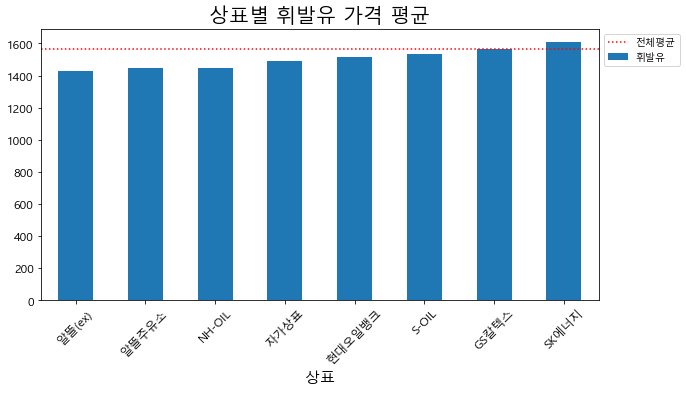

In [114]:
# 상표별 휘발유 평균가격 시각화
상표별_휘발유평균.plot(kind='bar', figsize=(10,5), rot=45)
# 전체 휘발유 평균
total_mean = df['휘발유'].mean()

plt.axhline(y=total_mean, color='red', label='전체평균', linestyle=":")  # 수평선을 그린다.
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('상표별 휘발유 가격 평균')
plt.show()

In [117]:
# 셀프주유소와 일반주유소 개수 확인
df['셀프여부'].value_counts()

일반    108492
셀프     73222
Name: 셀프여부, dtype: int64

In [127]:
df[['상호', '주소','셀프여부']].drop_duplicates()['셀프여부'].value_counts()#normalize=True)

일반    0.597656
셀프    0.402344
Name: 셀프여부, dtype: float64

In [130]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 
df.groupby('셀프여부')['휘발유'].mean()

셀프여부
셀프    1490.160266
일반    1619.107824
Name: 휘발유, dtype: float64

In [132]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
df.groupby(['상표', '셀프여부'])['휘발유'].mean().unstack()

셀프여부,셀프,일반
상표,,
GS칼텍스,1481.410074,1610.060123
NH-OIL,NaN,1449.088889
S-OIL,1481.437428,1579.451162
SK에너지,1504.853863,1690.377765
알뜰(ex),1431.347945,NaN
알뜰주유소,1434.726027,1455.372511
자가상표,1494.409449,1491.740351
현대오일뱅크,1483.546767,1534.254225


In [134]:
셀프여부_상표별_휘발유평균 = df.pivot_table(values='휘발유', index='상표', columns='셀프여부', aggfunc='mean')
셀프여부_상표별_휘발유평균 

셀프여부,셀프,일반
상표,,
GS칼텍스,1481.410074,1610.060123
NH-OIL,NaN,1449.088889
S-OIL,1481.437428,1579.451162
SK에너지,1504.853863,1690.377765
알뜰(ex),1431.347945,NaN
알뜰주유소,1434.726027,1455.372511
자가상표,1494.409449,1491.740351
현대오일뱅크,1483.546767,1534.254225


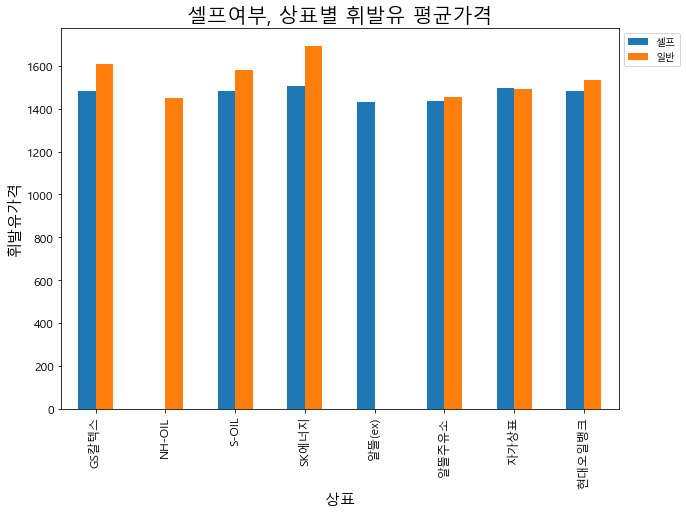

In [139]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화
셀프여부_상표별_휘발유평균.plot(kind='bar', figsize=(10,7))
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('셀프여부, 상표별 휘발유 평균가격')
plt.ylabel('휘발유가격')
plt.show()

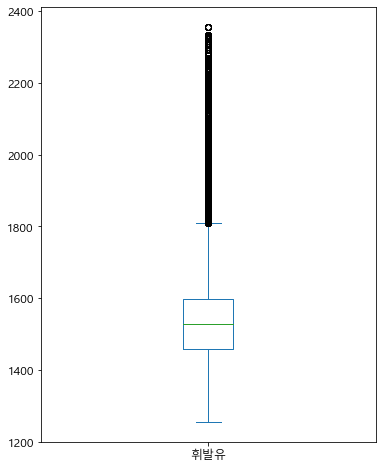

In [144]:
# 휘발유가격의 boxplot
df.query('휘발유!=0')['휘발유'].plot(kind='box', figsize=(6,8))
plt.show()

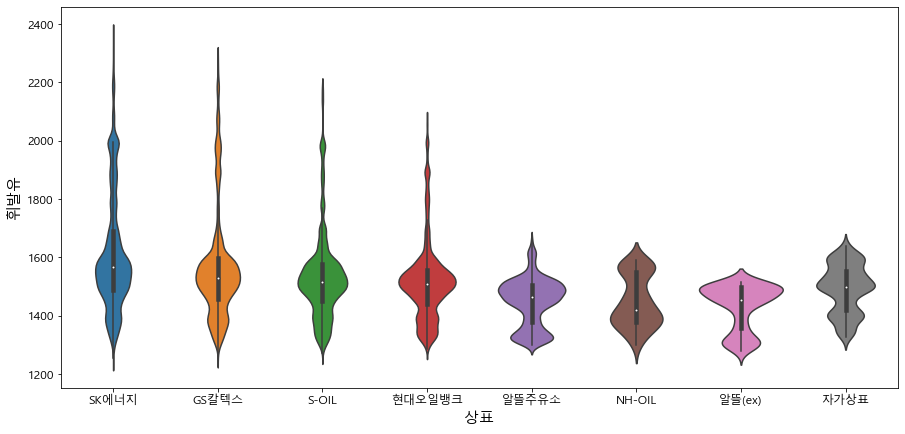

In [151]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
import seaborn as sns
plt.figure(figsize=(15,7))
# sns.boxplot(x='상표', y='휘발유', data=df.query('휘발유!=0'))
sns.violinplot(x='상표', y='휘발유', data=df.query('휘발유!=0'))
plt.show()

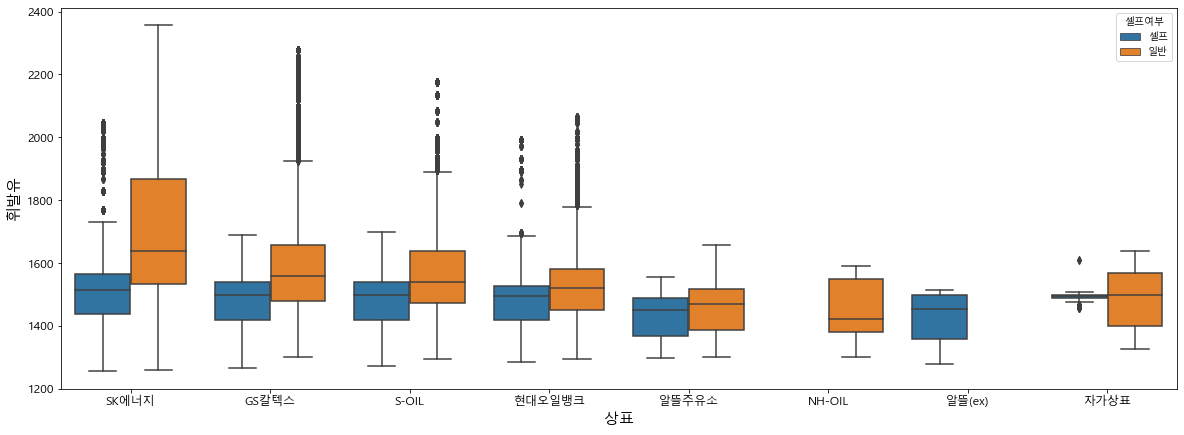

In [156]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
plt.figure(figsize=(20, 7))

sns.boxplot(x='상표', y='휘발유', hue='셀프여부', data=df.query('휘발유!=0'))
plt.show()

In [160]:
# 구별 휘발유 가격의 평균
df.query('휘발유!=0').groupby('구')['휘발유'].mean().sort_values()

구
강북구     1454.131601
중랑구     1469.009092
금천구     1477.121992
은평구     1481.964026
강서구     1489.173443
광진구     1490.597054
도봉구     1494.393741
동대문구    1507.399099
성북구     1508.321614
양천구     1513.055641
동작구     1513.717111
관악구     1518.635029
송파구     1518.957954
구로구     1525.410383
서대문구    1528.943332
노원구     1531.221551
영등포구    1568.279506
강동구     1577.487784
서초구     1577.704514
성동구     1583.659561
마포구     1690.590269
강남구     1713.328332
종로구     1838.554945
용산구     1887.254609
중구      1976.948052
Name: 휘발유, dtype: float64

In [165]:
# 중구(평균이 가장높음)의 상표별 휘발유 평균가격
df[df['구']=='중구'].groupby('상표')['휘발유'].mean().sort_values()

상표
자가상표      1418.859375
알뜰주유소     1601.552743
현대오일뱅크    1711.669903
S-OIL     1783.369863
SK에너지     2060.617512
GS칼텍스     2091.866438
Name: 휘발유, dtype: float64

In [168]:
# 월 평균 휘발유 가격의 평균 =====> 월별 평균 휘발유 가격
df.groupby('월')['휘발유'].mean().sort_values()

월
2     1446.624956
3     1465.159889
1     1466.554672
4     1519.481056
7     1585.726529
8     1589.339464
6     1605.343367
5     1606.096255
11    1620.687606
12    1630.535819
9     1633.125891
10    1634.464547
Name: 휘발유, dtype: float64

In [173]:
a = "abc"
a.strip?

In [170]:
df['지역'][0]

'서울 강남구'

In [19]:
# 각 구의 월별 평균 휘발유 가격 
월_구별_휘발유평균 = df.pivot_table(values='휘발유', index='월', columns='구', margins=True)
월_구별_휘발유평균

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,All
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1619.865825,1503.383302,1357.002488,1376.357474,1429.822262,1379.168459,1418.589124,1360.297767,1406.245161,1373.606112,1414.227273,1414.339806,1596.200993,1410.814516,1495.131514,1479.271347,1403.604488,1417.573361,1404.158915,1486.227823,1781.412903,1363.895636,1749.433692,1848.913978,1360.405242,1466.554672
2,1600.945536,1478.109244,1345.565934,1370.397959,1405.984127,1362.851190,1408.949675,1337.986264,1397.600000,1365.634951,1400.508117,1390.377698,1577.345566,1397.441964,1455.872477,1466.242105,1386.097027,1406.561503,1389.676991,1454.418527,1739.352645,1330.018908,1730.007937,1848.380952,1343.332589,1446.624956
3,1616.143548,1468.138277,1342.990074,1392.716129,1403.370510,1388.360215,1427.221408,1371.192982,1421.683871,1390.093190,1421.432551,1401.193548,1585.879056,1423.197581,1463.977649,1480.578748,1397.505865,1421.064581,1415.321622,1466.712551,1806.438710,1367.174573,1741.992832,1870.634409,1364.818376,1465.159889
4,1666.350000,1526.341667,1414.246154,1447.910749,1456.301230,1451.507407,1477.038052,1438.646154,1484.722222,1451.424861,1472.259091,1454.729097,1640.155015,1479.756250,1515.292308,1528.055118,1450.840909,1464.520334,1479.093793,1522.575000,1836.563474,1439.952941,1779.411111,1904.650000,1429.393333,1519.481056
5,1739.208232,1605.267206,1500.025126,1543.218433,1548.151210,1547.330341,1566.923642,1529.620347,1586.740175,1545.358423,1559.993874,1529.654839,1720.032448,1580.118026,1607.007444,1617.527514,1546.357771,1553.783620,1558.715561,1602.545363,1893.453362,1539.197343,1856.232975,1985.540845,1518.455914,1606.096255
6,1744.065833,1608.388309,1491.889744,1522.746425,1564.633333,1540.320370,1562.271212,1510.461538,1569.823661,1548.606679,1549.618902,1549.444816,1740.854103,1582.564444,1625.056459,1626.147348,1554.769697,1554.568300,1548.231283,1586.283473,1901.231111,1531.676529,1863.500000,2011.624242,1512.642222,1605.343367
7,1734.204712,1588.002020,1469.147132,1502.133396,1543.155242,1508.003584,1542.331378,1491.776675,1552.664516,1523.568696,1524.170088,1522.993548,1732.835294,1547.602151,1598.617724,1600.178368,1534.840176,1540.997980,1525.377261,1570.332659,1901.079570,1507.068311,1860.078853,2004.487603,1480.929293,1585.726529
8,1735.209040,1589.324597,1468.318408,1508.055028,1543.354839,1512.141818,1543.788856,1491.372208,1556.690323,1526.870968,1525.146628,1529.500000,1726.242424,1550.929032,1599.360070,1601.345420,1544.298969,1545.417339,1532.414729,1574.178427,1902.374194,1508.076046,1863.913978,2006.897849,1493.768145,1589.339464
9,1773.644167,1638.926931,1514.569231,1554.135693,1586.991649,1558.492278,1585.204545,1539.167526,1601.920000,1570.620387,1552.095599,1582.106667,1743.018182,1601.993304,1644.167568,1646.283730,1581.690363,1597.801463,1576.305195,1629.180396,1946.780761,1549.731373,1917.268199,2056.847222,1530.306250,1633.125891


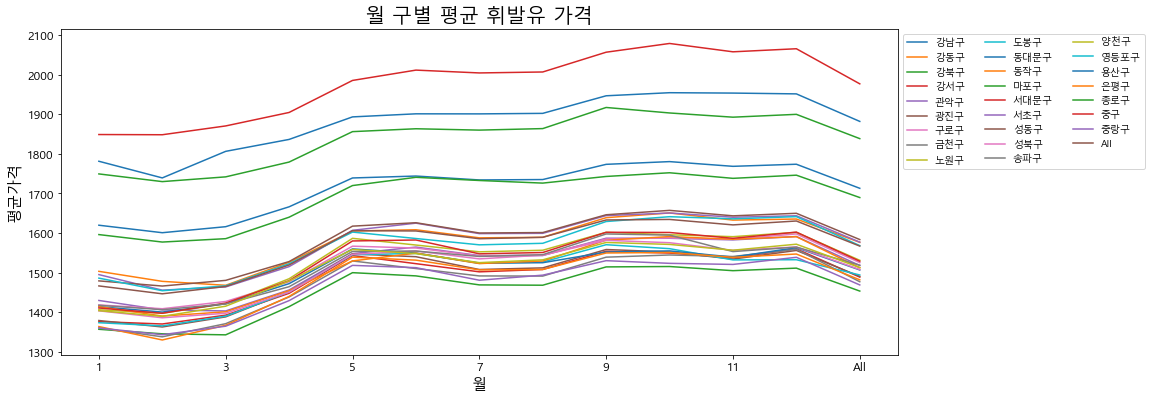

In [23]:
# 각 구의 월별 평균가격의 변화추이 시각화
# x: 월(index), y: 평균가격, 구별(column)로 나눠서 시각화
월_구별_휘발유평균.plot(kind='line', figsize=(15, 6), title='월 구별 평균 휘발유 가격', ylabel='평균가격')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=3) # label이 많을 경우 여러줄로 나오도록 처리: ncol=줄수
plt.show()

In [32]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - 같은 주유소가 여러개 나오므로 평균 또는 max값으로 (평균 기준)
비싼주유소 = df.groupby('상호')['휘발유'].max().sort_values(ascending=False).head()  #max값 기준. 평균값기준: mean() 메소드 사용. (max()대신)
비싼주유소

상호
서남주유소          2356
SC(주) 역전주유소    2278
필동주유소          2259
장충주유소          2250
뉴서울(강남)        2218
Name: 휘발유, dtype: int64

In [34]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - 같은 주유소가 여러개 나오므로 평균 또는 max값으로 (평균 기준)
저렴한주유소 = df.groupby('상호')['휘발유'].max().sort_values().head()  
저렴한주유소

상호
SK네트웍스(주) 서울셀프주유소    1419
(주)창원현대주유소           1449
관악로주유소               1489
엘스카운티(주)천동주유소        1498
북서울고속주유소             1499
Name: 휘발유, dtype: int64

In [42]:
df.loc[df['상호']=='서남주유소', ['상호', '주소']].drop_duplicates()  # 중복된 행을 drop하고 한행만 반환.

,상호,주소
86231,서남주유소,서울 중구 통일로 30


In [48]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates)
# 비싼주유소 Series 의  index를 이용해 조회
# 비싼주유소.index
df.loc[df['상호'].isin(비싼주유소.index), ['상호', '지역', '주소']].drop_duplicates()   #where 상호 in ['서남주유소', 'SC(주) 역전주유소', '필동주유소', '장충주유소', '뉴서울(강남)']

,상호,지역,주소
2896,뉴서울(강남),서울 강남구,서울 강남구 언주로 716 (논현동)
85869,SC(주) 역전주유소,서울 중구,서울 중구 퇴계로 15
86231,서남주유소,서울 중구,서울 중구 통일로 30
86955,장충주유소,서울 중구,서울 중구 장충단로 202 (장충동1가)
87317,필동주유소,서울 중구,서울 중구 퇴계로 196 (필동2가)


In [49]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)
df.loc[df['상호'].isin(저렴한주유소.index), ['상호', '지역', '주소']].drop_duplicates()

,상호,지역,주소
9436,엘스카운티(주)천동주유소,서울 강동구,서울 강동구 천호대로 987 (천호동)
11120,북서울고속주유소,서울 강북구,서울 강북구 삼양로 410 (수유동)
19607,SK네트웍스(주) 서울셀프주유소,서울 관악구,서울 관악구 신림로 183 (신림동)
20067,관악로주유소,서울 관악구,서울특별시 관악구 관악로 260 (봉천동)
46052,(주)창원현대주유소,서울 서대문구,서울 서대문구 통일로 537


In [51]:
df['고급휘발유'].agg(['min', 'max'])

min       0
max    2699
Name: 고급휘발유, dtype: int64

In [55]:
df[df['고급휘발유']!=0]

,Unnamed: 0,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,1,1,화
1,1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,1,2,수
2,2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,1,3,목
3,3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,1,4,금
4,4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,1,5,토
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181525,181525,A0009180,서울 중랑구,지에스칼텍스㈜ 대원주유소,서울 중랑구 동일로 600,2019-12-27,GS칼텍스,셀프,1773,1523,1354,1010,중랑구,12,27,금
181526,181526,A0009180,서울 중랑구,지에스칼텍스㈜ 대원주유소,서울 중랑구 동일로 600,2019-12-28,GS칼텍스,셀프,1773,1523,1354,1010,중랑구,12,28,토
181527,181527,A0009180,서울 중랑구,지에스칼텍스㈜ 대원주유소,서울 중랑구 동일로 600,2019-12-29,GS칼텍스,셀프,1773,1523,1354,1010,중랑구,12,29,일
181528,181528,A0009180,서울 중랑구,지에스칼텍스㈜ 대원주유소,서울 중랑구 동일로 600,2019-12-30,GS칼텍스,셀프,1773,1523,1354,1010,중랑구,12,30,월


In [53]:
# 고급 휘발유를 가장 많이 파는 구 조회
df.query('고급휘발유!=0').groupby('구')['고급휘발유'].count().sort_values(ascending=False)

구
강남구     12136
서초구      9400
용산구      5390
송파구      5099
강서구      4288
중구       3352
양천구      3004
영등포구     2653
성동구      2544
강동구      2511
성북구      2508
광진구      2337
종로구      2282
서대문구     2077
은평구      2021
마포구      1982
노원구      1825
도봉구      1458
관악구      1341
강북구      1234
동대문구     1093
동작구      1022
구로구       807
중랑구       730
금천구       364
Name: 고급휘발유, dtype: int64

In [ ]:
# 주유소 가격 데이터를 이용해서 추가적으로 알아내고 싶은 것들을 정하시고 분석해 보세요.
